In [594]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [309]:
def getDf(path = '../resources/augmentation'):
  all_folder = os.listdir(path)
  df = pd.DataFrame(columns=['number_img', 'disease', 'disease_family', 'healthy', 'specie'], index=all_folder)

  for name_folder in all_folder:
    files = os.listdir(f"{path}/{name_folder}");
    name_splited = name_folder.split('___')
    df.loc[name_folder].specie = name_splited[0].lower()
    df.loc[name_folder].number_img = len(files)
    df.loc[name_folder].disease = name_splited[-1].lower()
    df.loc[name_folder].disease_family = df.loc[name_folder].disease.split('_')[-1].replace(')', '')
    df.loc[name_folder].healthy = name_splited[-1] == 'healthy'
  return df

In [404]:
df_augmentation = getDf('../resources/augmentation')
df_no_augmentation = getDf('../resources/no_augmentation')
display(df_augmentation.head(5))
display(df_no_augmentation.head(5))

number_img         disease disease_family healthy  \
Strawberry___healthy          1000         healthy        healthy    True   
Grape___Black_rot             1180       black_rot            rot   False   
Potato___Early_blight         1000    early_blight         blight   False   
Blueberry___healthy           1502         healthy        healthy    True   
Cherry___Powdery_mildew       1052  powdery_mildew         mildew   False   

                             specie  
Strawberry___healthy     strawberry  
Grape___Black_rot             grape  
Potato___Early_blight        potato  
Blueberry___healthy       blueberry  
Cherry___Powdery_mildew      cherry

number_img         disease disease_family healthy  \
Strawberry___healthy           456         healthy        healthy    True   
Grape___Black_rot             1180       black_rot            rot   False   
Potato___Early_blight         1000    early_blight         blight   False   
Blueberry___healthy           1502         healthy        healthy    True   
Cherry___Powdery_mildew       1052  powdery_mildew         mildew   False   

                             specie  
Strawberry___healthy     strawberry  
Grape___Black_rot             grape  
Potato___Early_blight        potato  
Blueberry___healthy       blueberry  
Cherry___Powdery_mildew      cherry

# Number of images by files

<AxesSubplot:xlabel='number_img'>

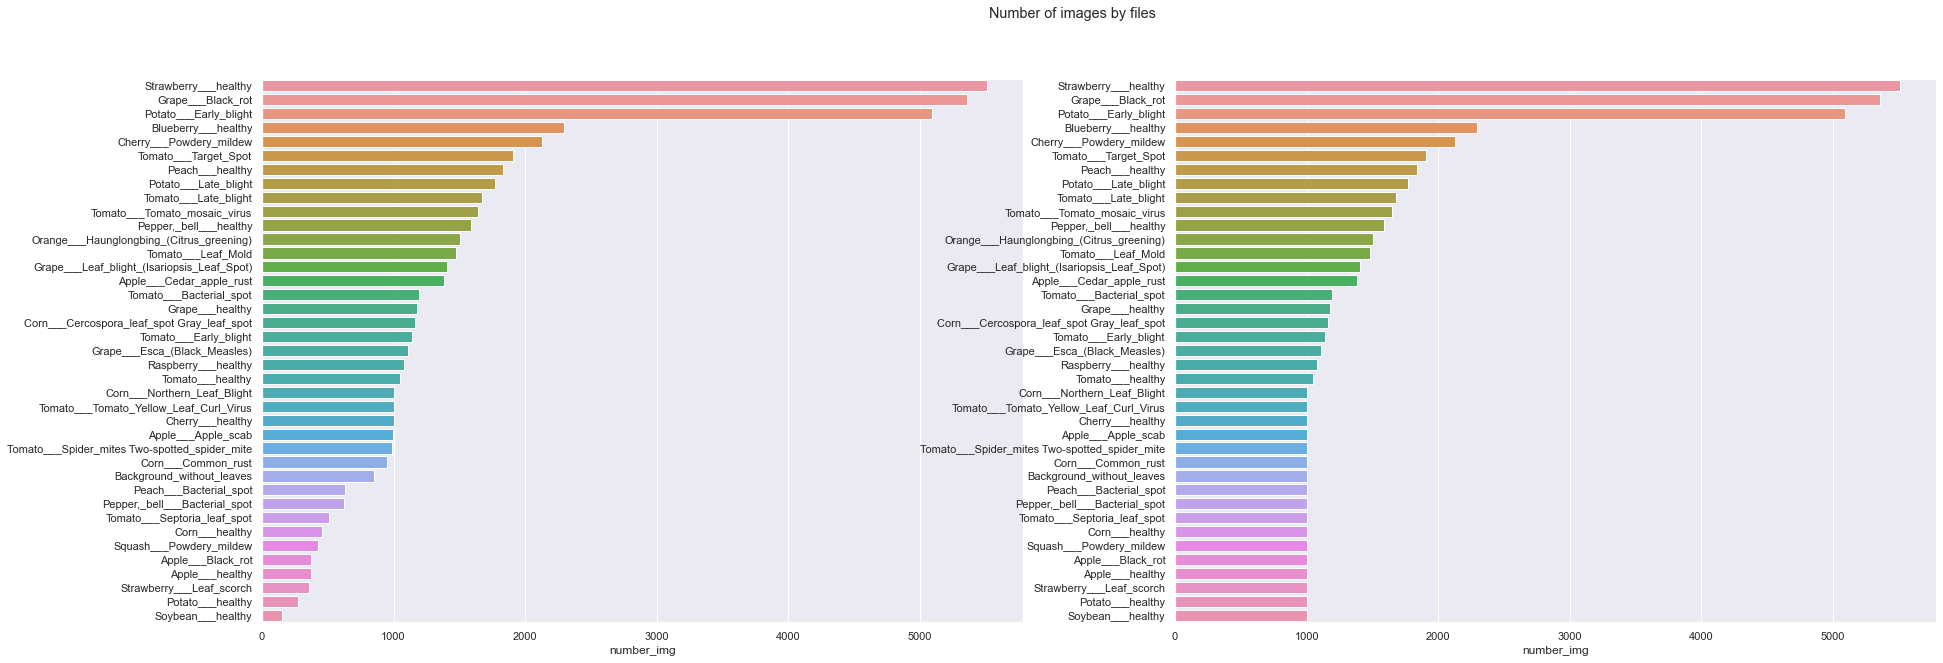

In [406]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number of images by files')

sns.barplot(ax=axes[0], y=df_no_augmentation.index, x='number_img', data=df_no_augmentation.sort_values(by=['number_img'], ascending=False))
sns.barplot(ax=axes[1], y=df_augmentation.index, x='number_img', data=df_augmentation.sort_values(by=['number_img'], ascending=False))

# Species and number of images

Text(0.5, 1.0, 'with augmentation')

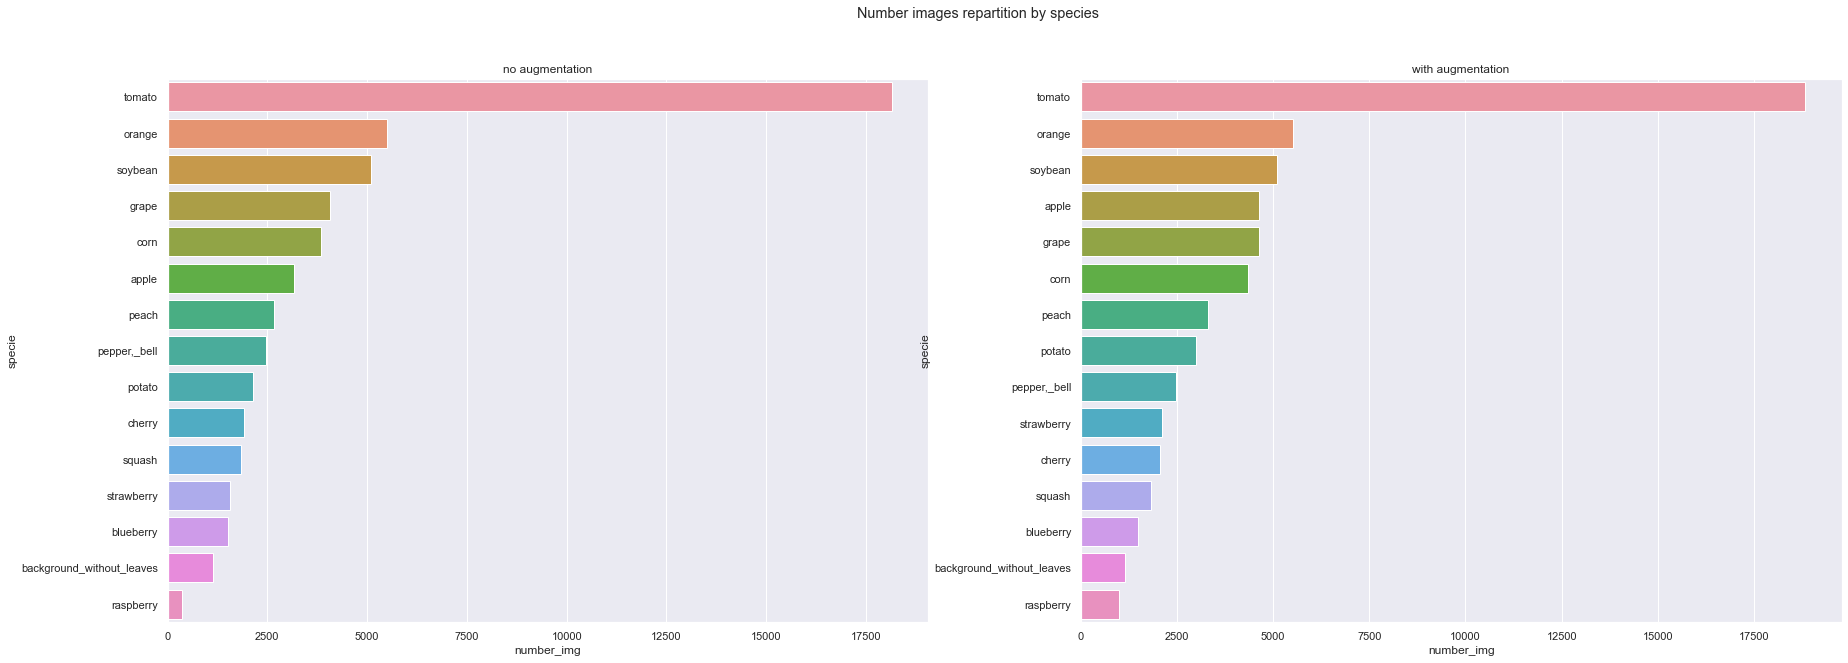

In [457]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number images repartition by species')

df_no_augmentation_groupby_specie = df_no_augmentation.groupby(by='specie').sum()
df_no_augmentation_groupby_specie.reset_index(inplace=True)

df_augmentation_groupby_specie = df_augmentation.groupby(by='specie').sum()
df_augmentation_groupby_specie.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="specie", data=df_no_augmentation_groupby_specie, order=df_no_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)
sns.barplot(ax=axes[1], x="number_img", y="specie", data=df_augmentation_groupby_specie, order=df_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

# Healthy repartition

Text(0.5, 1.0, 'with augmentation')

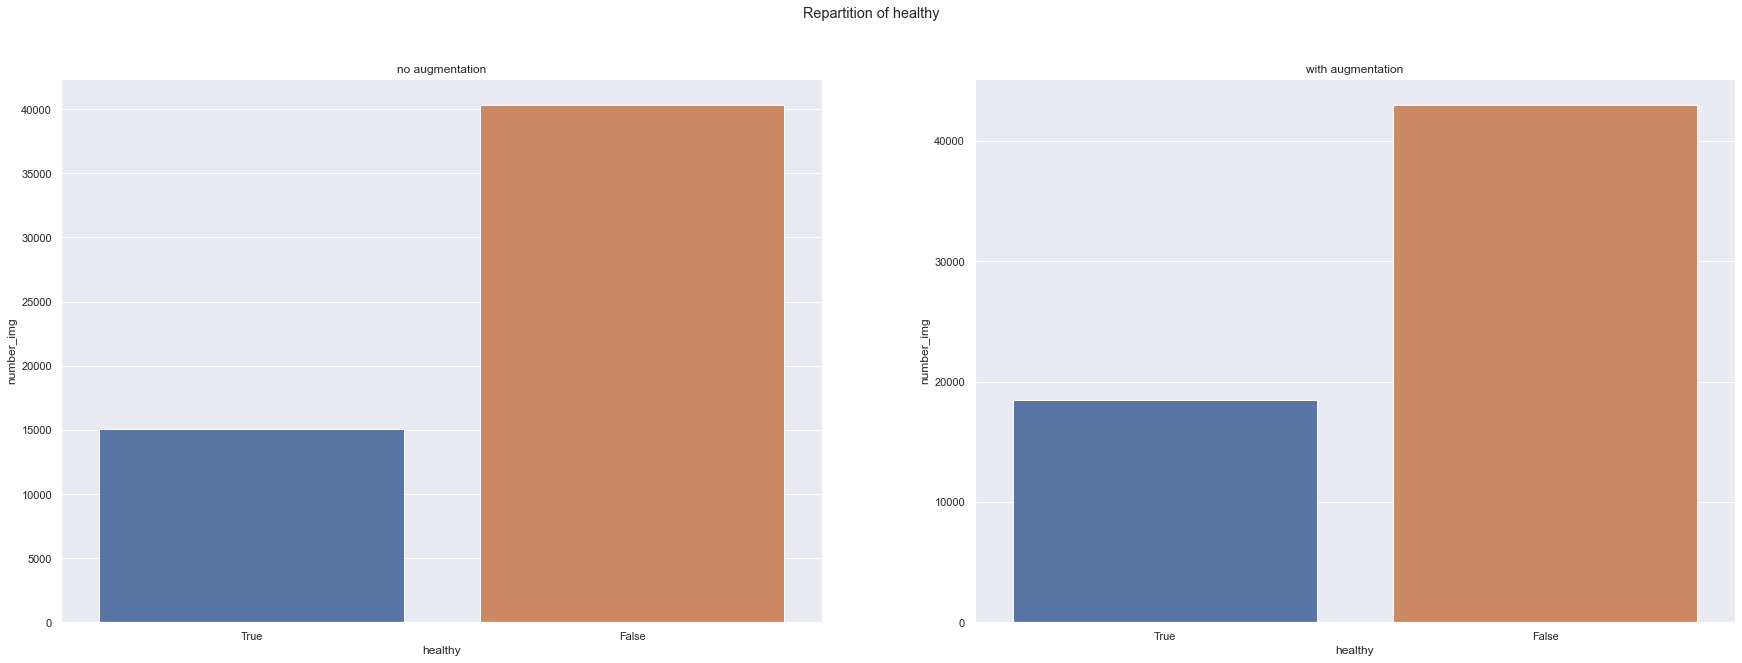

In [441]:
df_no_healthy = df_no_augmentation.copy()
df_no_healthy.healthy = df_no_healthy.healthy.astype(str)
df_no_healthy = df_no_healthy.groupby(by='healthy').sum()
df_no_healthy.reset_index(inplace=True)
df_no_healthy = df_no_healthy.sort_values('healthy', ascending=False)

df_healthy = df_augmentation.copy()
df_healthy.healthy = df_healthy.healthy.astype(str)
df_healthy = df_healthy.groupby(by='healthy').sum()
df_healthy.reset_index(inplace=True)
df_healthy = df_healthy.sort_values('healthy', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Repartition of healthy')

sns.barplot(ax=axes[0], y="number_img", x="healthy", data=df_no_healthy)
sns.barplot(ax=axes[1], y="number_img", x="healthy", data=df_healthy)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

Text(0.5, 1.0, 'with augmentation')

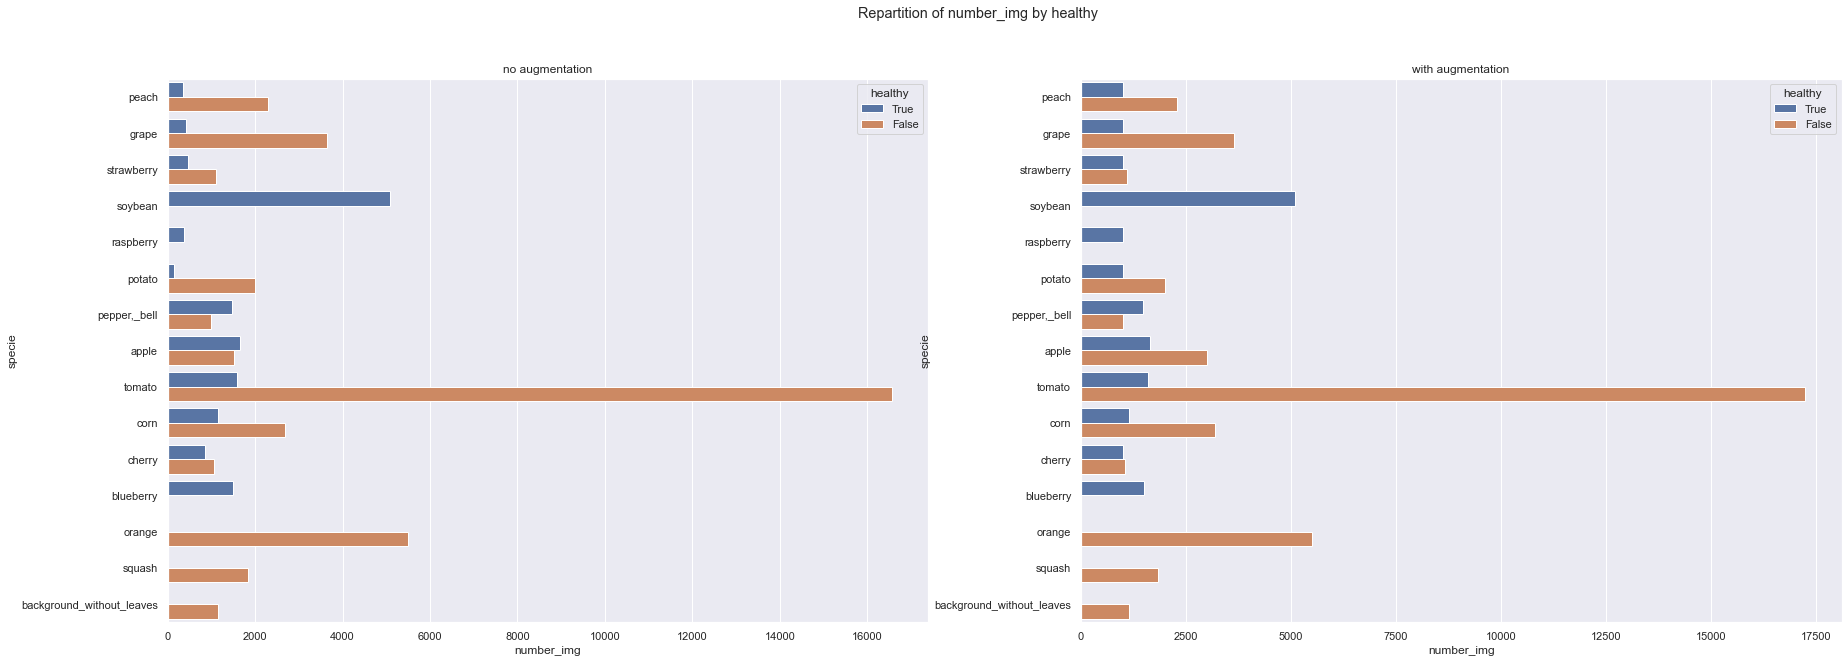

In [507]:
df_no_aug_health = df_no_augmentation.copy()
df_no_aug_health.healthy = df_no_aug_health.healthy.astype(str)
df_no_aug_health = df_no_aug_health.groupby(['specie', 'healthy']).sum()
df_no_aug_health.reset_index(inplace=True)
df_no_aug_health = df_no_aug_health.sort_values('healthy', ascending=False)

df_aug_health = df_augmentation.copy()
df_aug_health.healthy = df_aug_health.healthy.astype(str)
df_aug_health = df_aug_health.groupby(['specie', 'healthy']).sum()
df_aug_health.reset_index(inplace=True)
df_aug_health = df_aug_health.sort_values('healthy', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Repartition of number_img by healthy')

sns.barplot(ax=axes[0], x="number_img", y="specie", hue="healthy", data=df_no_aug_health)
sns.barplot(ax=axes[1], x="number_img", y="specie", hue="healthy", data=df_aug_health)
axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

- `squash, orange` have no healthy directory.
- `soybean, raspberry blueberry` have no disease directory.

# Disease repartition

'For tomato'

no_augmentation  augmentation
max                    5357          5357
min                     373          1000
difference             4984          4357

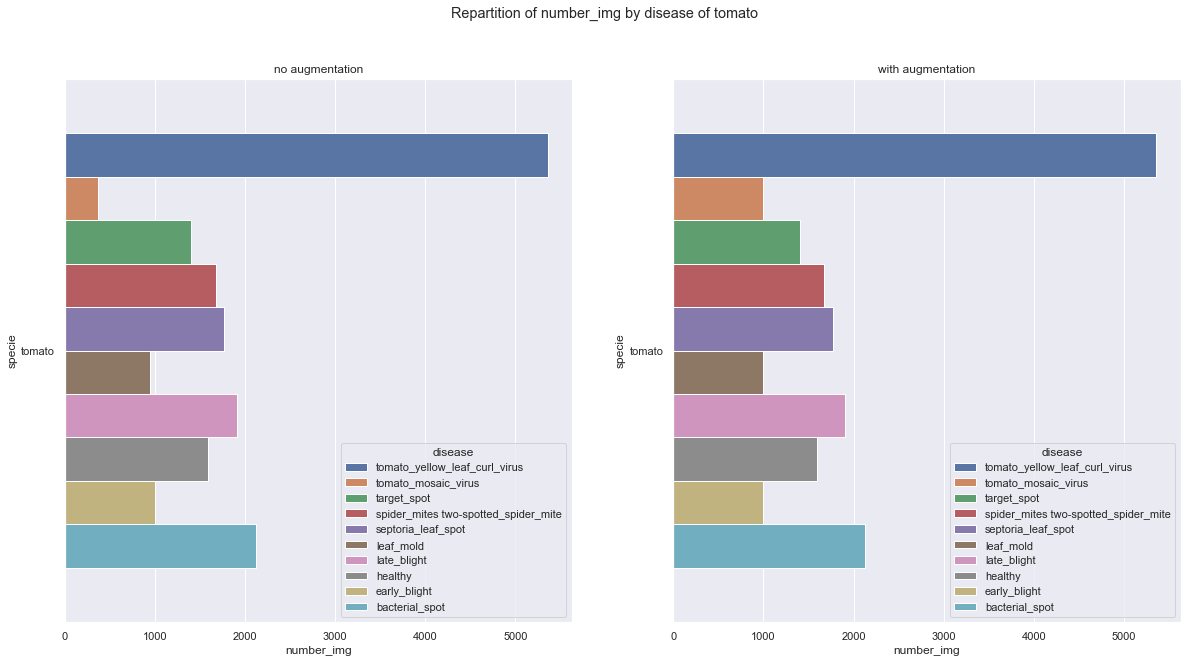

'For cherry'

no_augmentation  augmentation
max                    1052          1052
min                     854          1000
difference              198            52

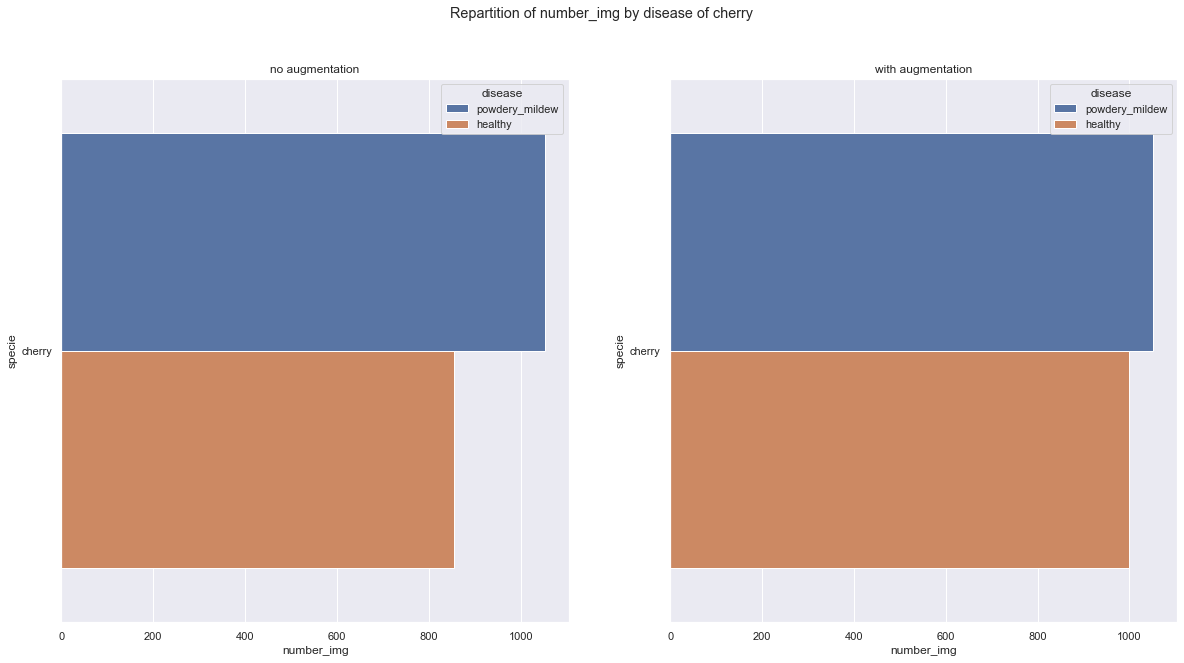

'For corn'

no_augmentation  augmentation
max                    1192          1192
min                     513          1000
difference              679           192

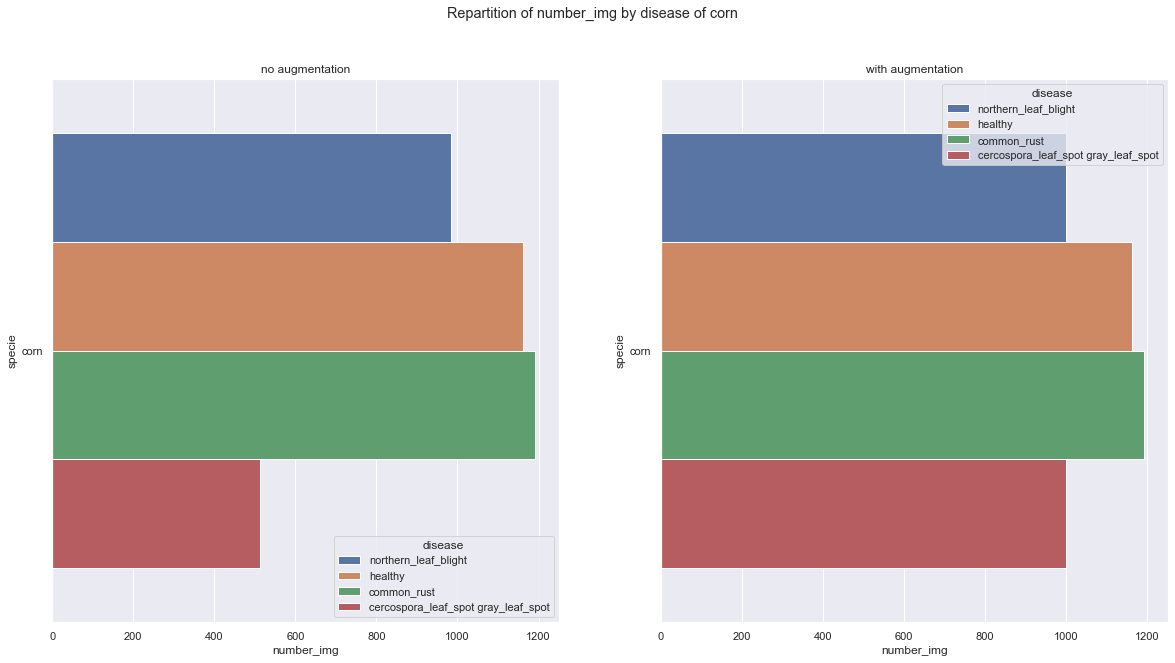

'For strawberry'

no_augmentation  augmentation
max                    1109          1109
min                     456          1000
difference              653           109

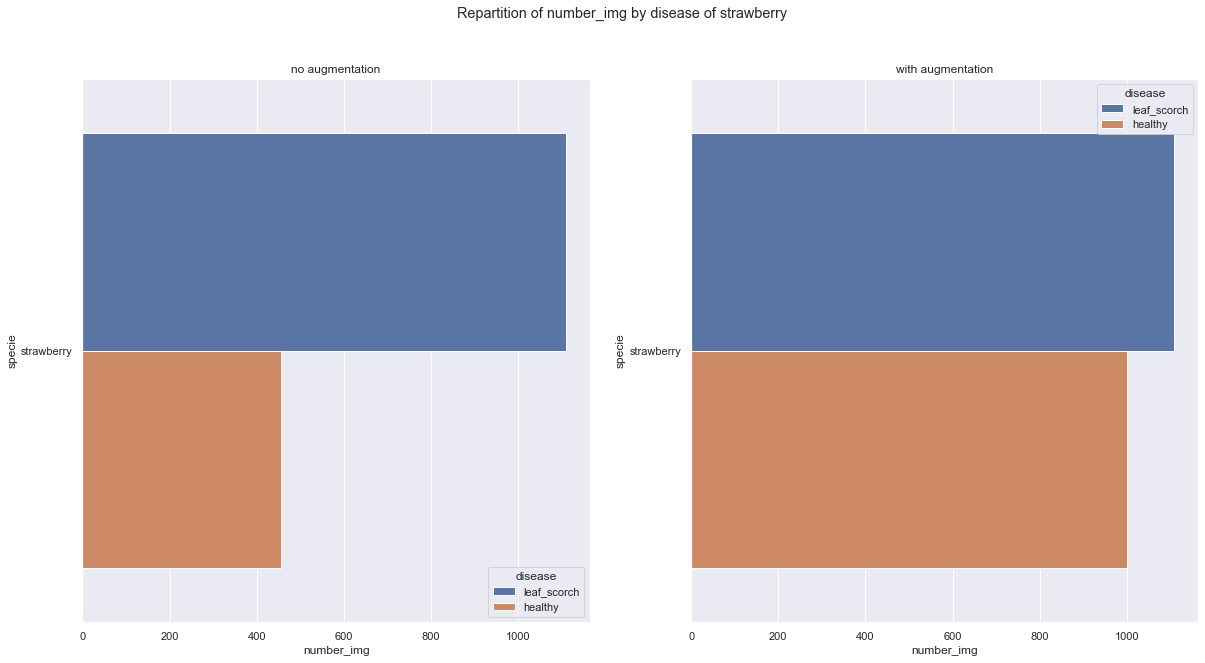

'For grape'

no_augmentation  augmentation
max                    1383          1383
min                     423          1000
difference              960           383

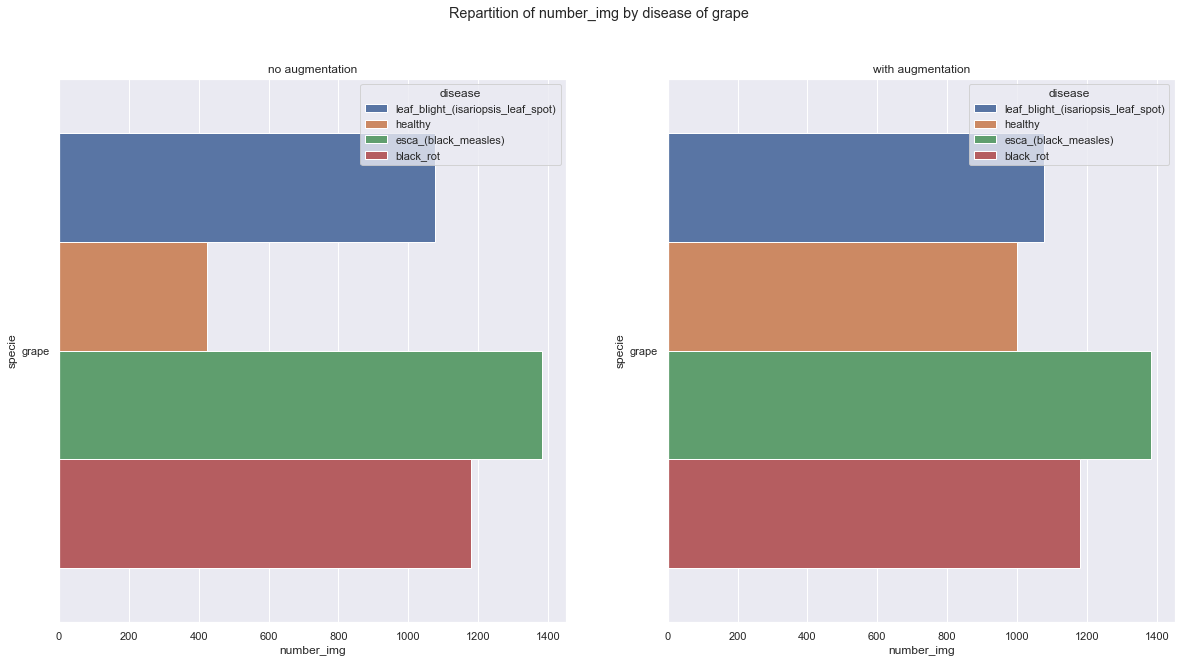

'For potato'

no_augmentation  augmentation
max                    1000          1000
min                     152          1000
difference              848             0

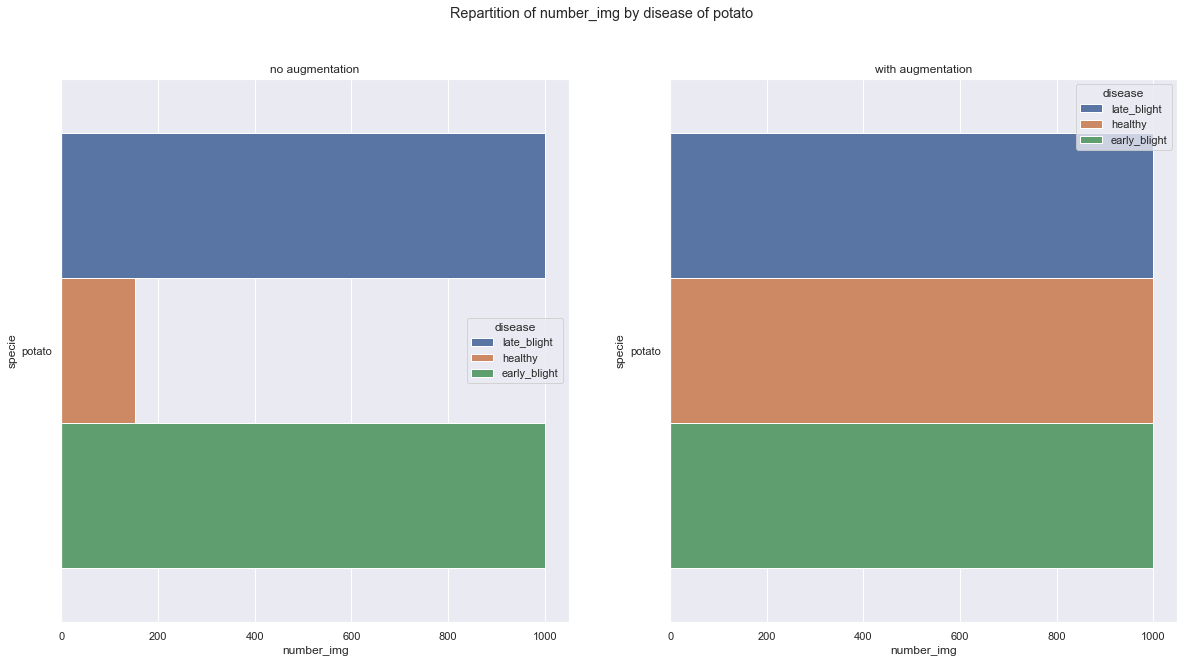

'For pepper,_bell'

no_augmentation  augmentation
max                    1478          1478
min                     997          1000
difference              481           478

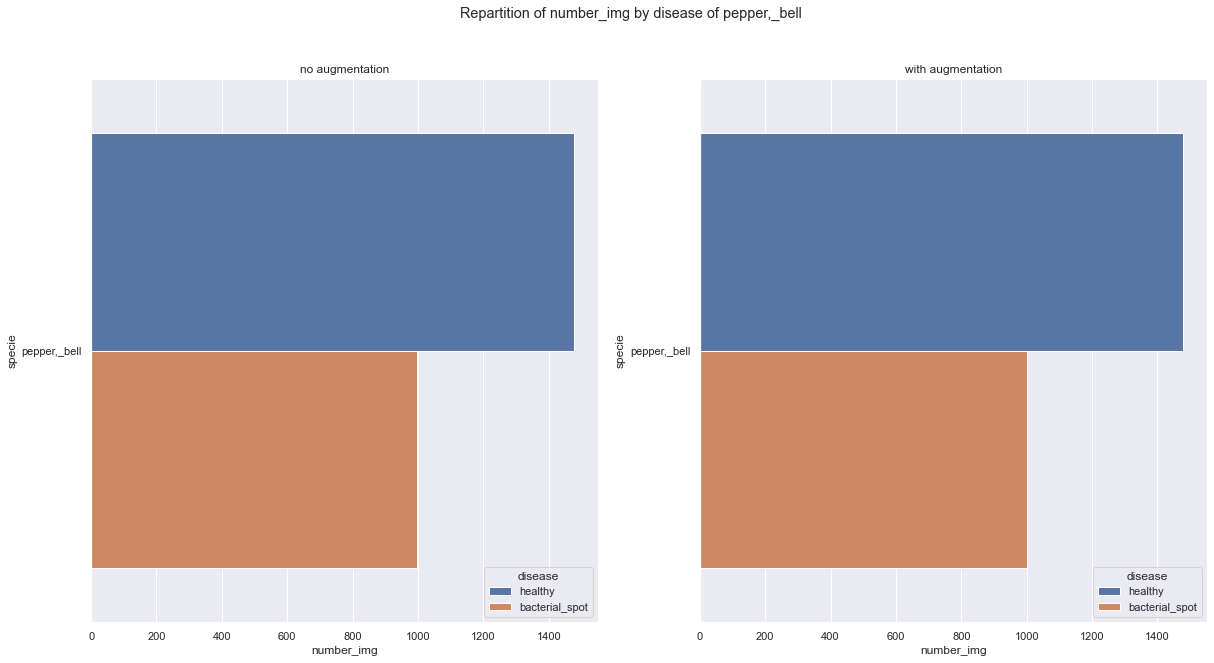

'For apple'

no_augmentation  augmentation
max                    1645          1645
min                     275          1000
difference             1370           645

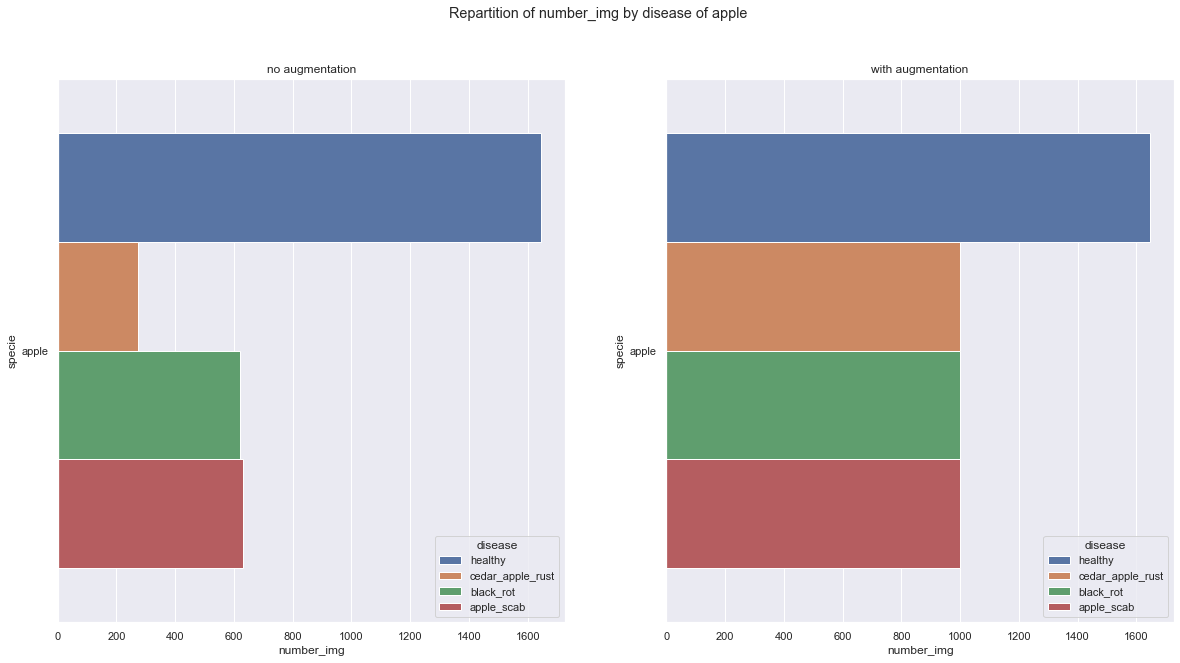

'For peach'

no_augmentation  augmentation
max                    2297          2297
min                     360          1000
difference             1937          1297

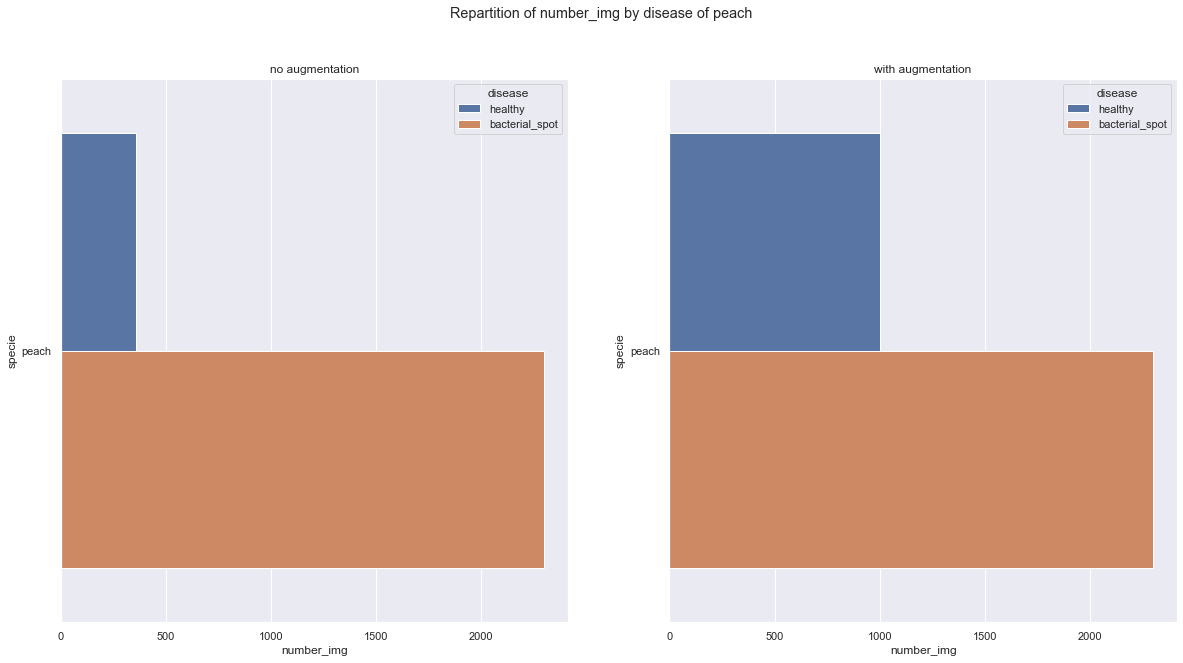

no_aug_diff  aug_diff
tomato               4984      4357
peach                1937      1297
apple                1370       645
grape                 960       383
potato                848         0
corn                  679       192
strawberry            653       109
pepper,_bell          481       478
cherry                198        52

In [593]:
df_no_aug_group_disease = df_no_augmentation.copy()
df_no_aug_group_disease.healthy = df_no_aug_group_disease.healthy.astype(str)
df_no_aug_group_disease = df_no_aug_group_disease.groupby(['specie', 'disease']).sum()
df_no_aug_group_disease.reset_index(inplace=True)
df_no_aug_group_disease = df_no_aug_group_disease.sort_values('disease', ascending=False)

df_aug_group_disease = df_augmentation.copy()
df_aug_group_disease.healthy = df_aug_group_disease.healthy.astype(str)
df_aug_group_disease = df_aug_group_disease.groupby(['specie', 'disease']).sum()
df_aug_group_disease.reset_index(inplace=True)
df_aug_group_disease = df_aug_group_disease.sort_values('disease', ascending=False)


keys = df_no_aug_group_disease.specie.drop_duplicates().reset_index().specie.values
result_stats = {}

for key in keys:
  current_no_df = df_no_aug_group_disease[df_no_aug_group_disease['specie'] == key]
  current_df = df_aug_group_disease[df_no_aug_group_disease['specie'] == key]

  if len(current_df) > 1:
    no_aug_max = current_no_df['number_img'].max() 
    no_aug_min = current_no_df['number_img'].min() 
    no_aug_diff = no_aug_max - no_aug_min

    aug_max = current_df['number_img'].max() 
    aug_min = current_df['number_img'].min() 
    aug_diff = aug_max - aug_min

    data = {
      'no_augmentation': {
        'max': no_aug_max, 'min': no_aug_min, 'difference': no_aug_diff
      },
      'augmentation': {
        'max': aug_max, 'min': aug_min, 'difference': aug_diff
      }
    }
    df_stats = pd.DataFrame(data, columns=['no_augmentation', 'augmentation'], index=['max', 'min', 'difference'])
    display(f"For {key}", df_stats)
    result_stats.update({key: {'no_aug_diff': no_aug_diff, 'aug_diff': aug_diff}})
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'Repartition of number_img by disease of {key}')

    sns.barplot(ax=axes[0], x="number_img", y="specie", hue="disease", data=current_no_df)
    sns.barplot(ax=axes[1], x="number_img", y="specie", hue="disease", data=current_df)
    axes[0].set_title('no augmentation')
    axes[1].set_title('with augmentation')
    plt.show()
result_stats = pd.DataFrame(result_stats).T.sort_values(by=['no_aug_diff', 'aug_diff'], ascending=False)
display(result_stats)



Text(0.5, 1.0, 'with augmentation')

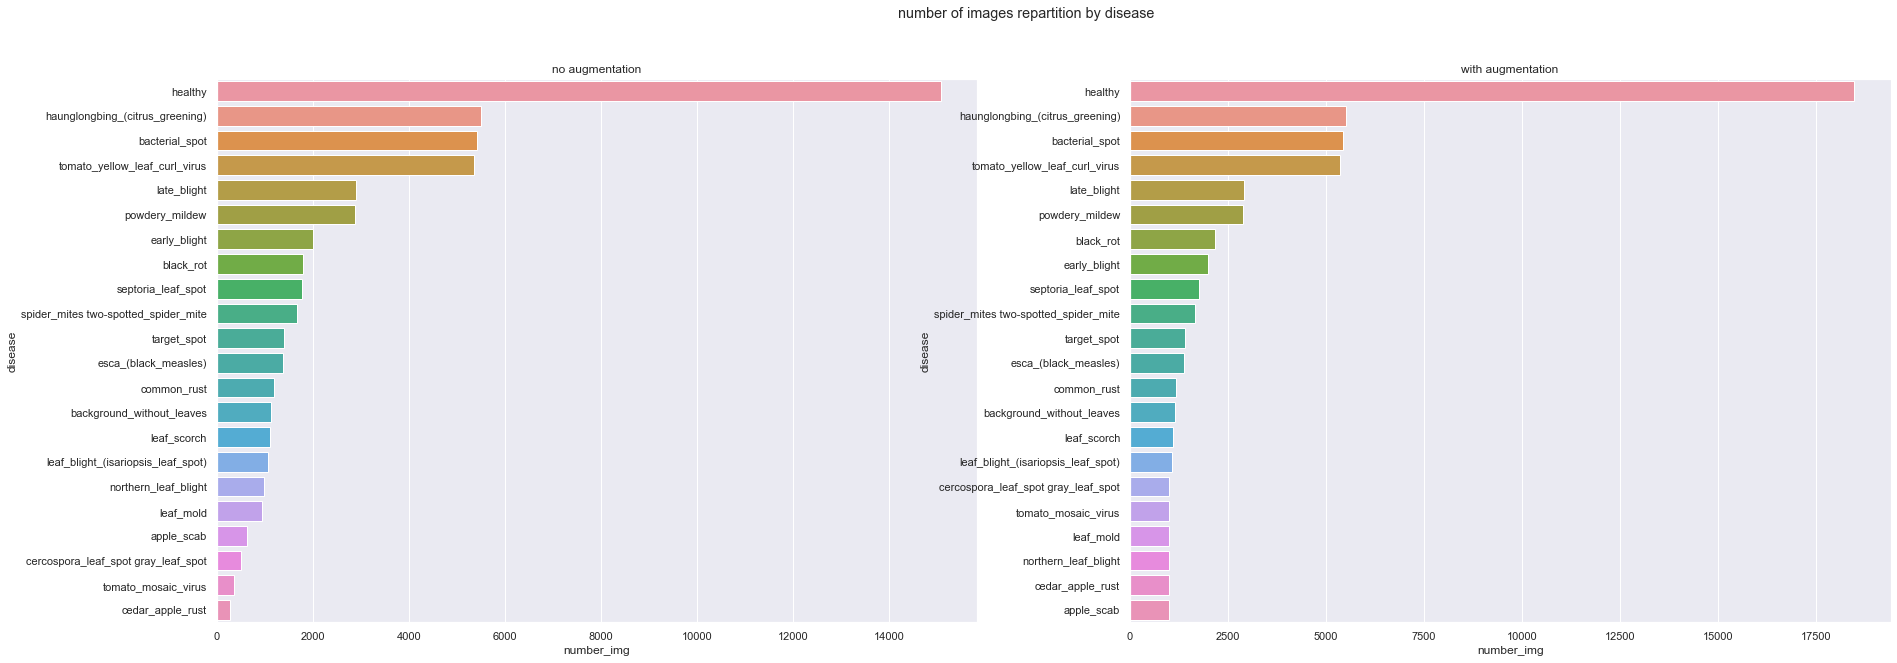

In [348]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('number of images repartition by disease')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)
sns.barplot(ax=axes[1], x="number_img", y="disease", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

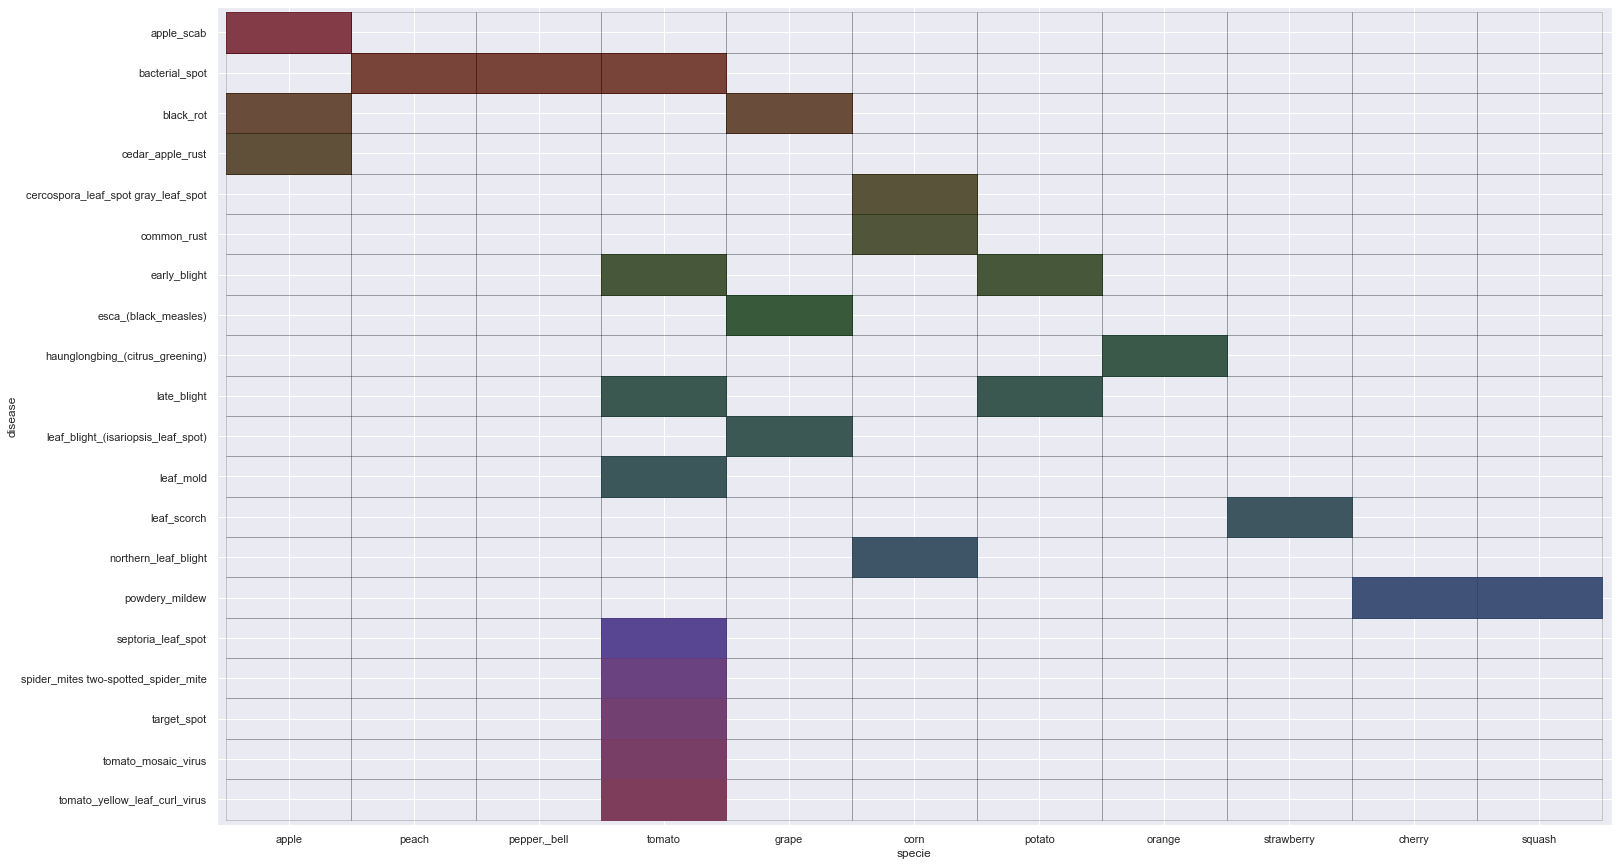

In [709]:
df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by=['disease', 'specie']).sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[~df_no_augmentation_groupby_disease['healthy']]
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[df_no_augmentation_groupby_disease['disease'] != 'background_without_leaves']


plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease", x='specie', hue="disease", data=df_no_augmentation_groupby_disease, legend=False, edgecolor="#02080602", linewidth=1)
ax.margins(x=0.007, y=0.007)

See if disease look like same according specie

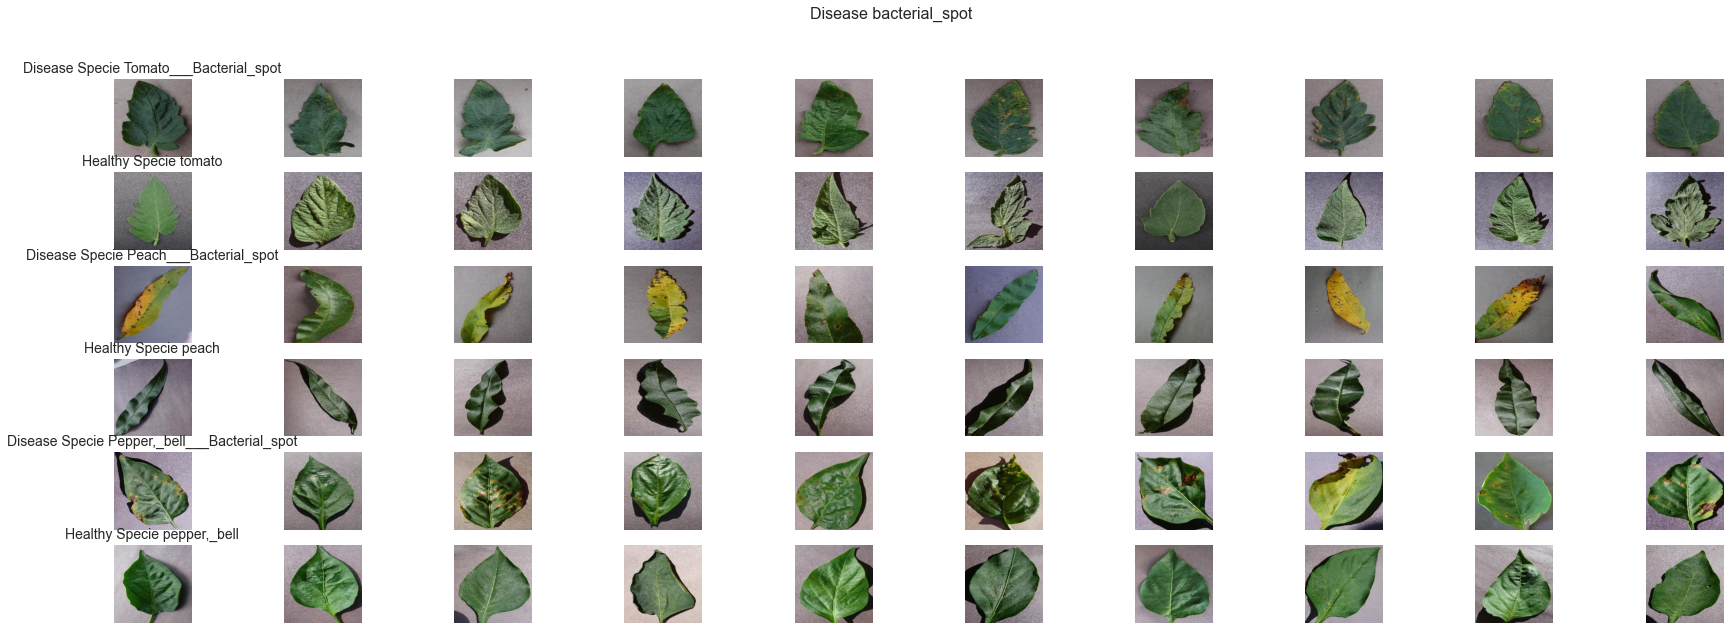

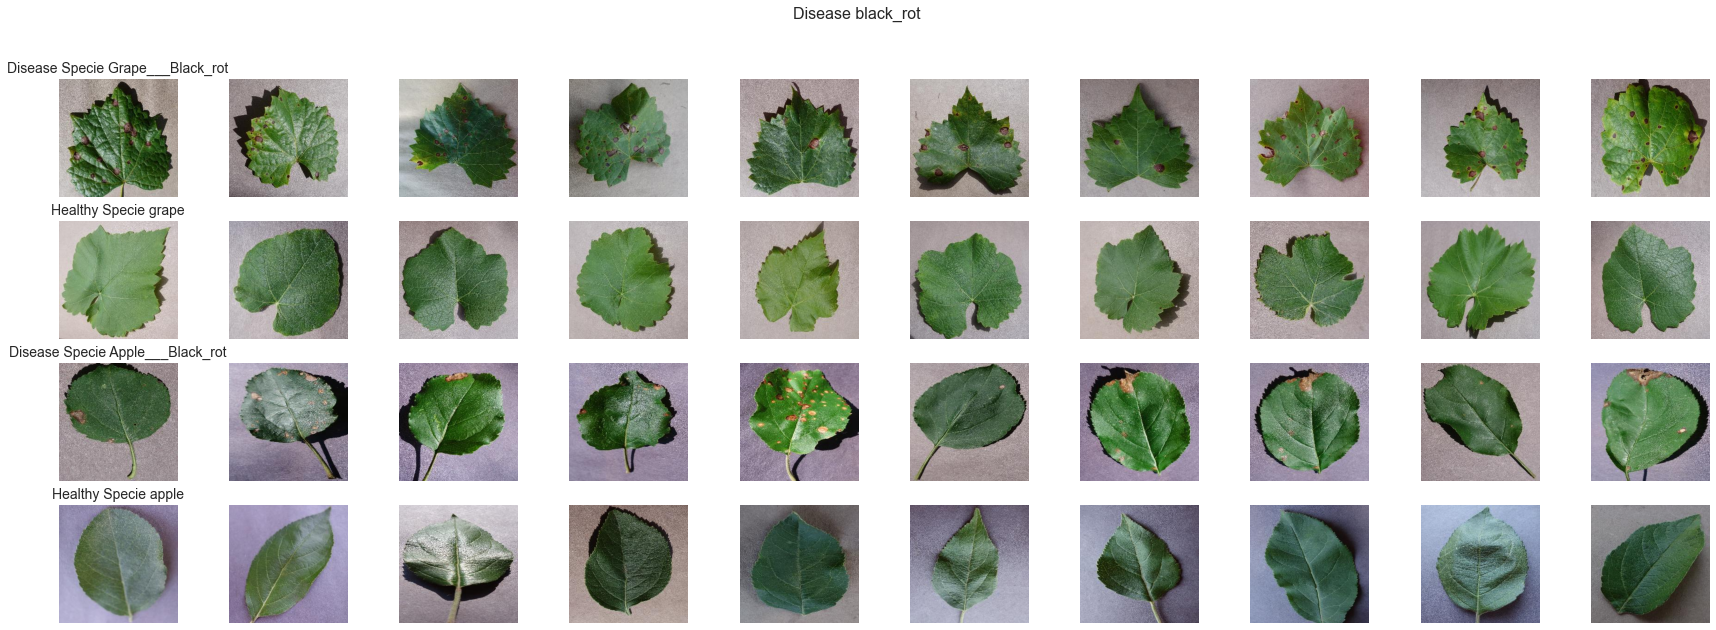

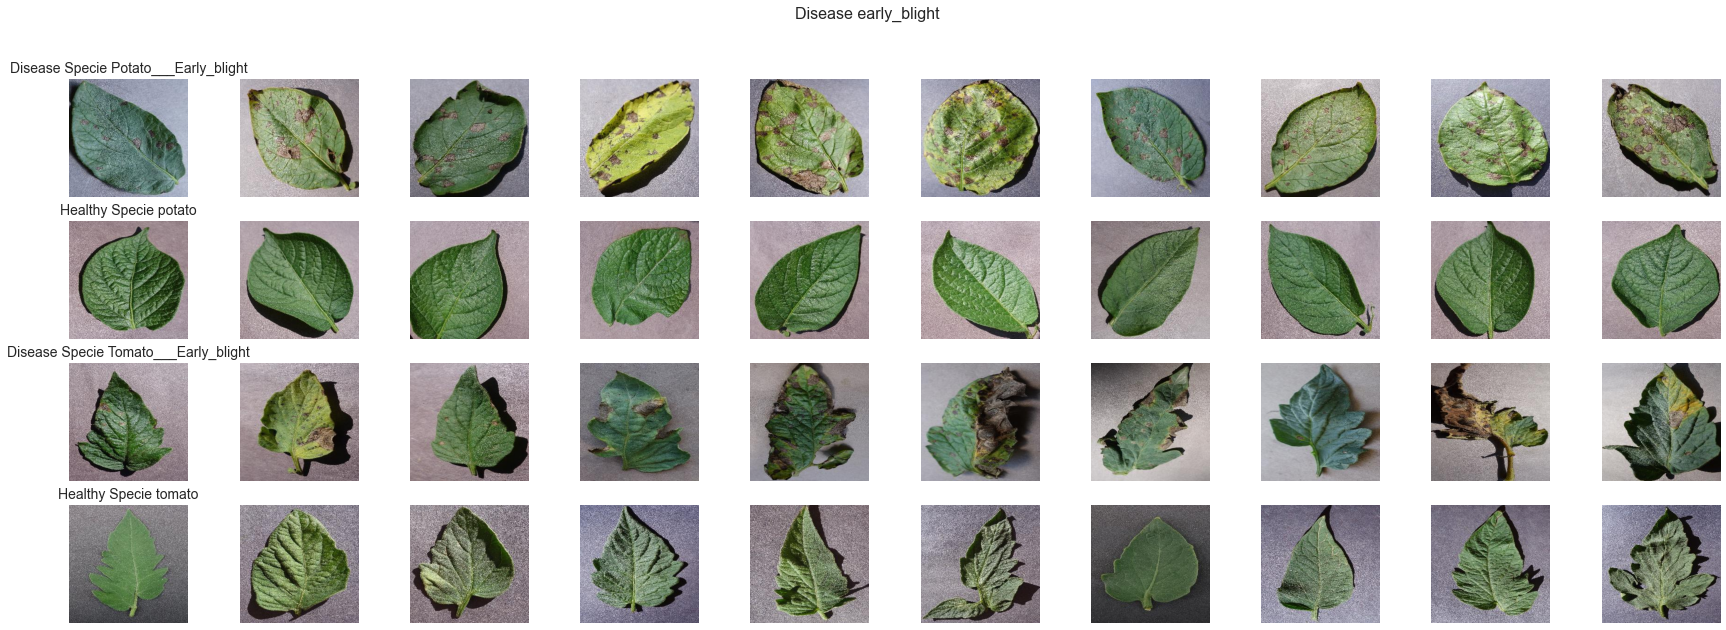

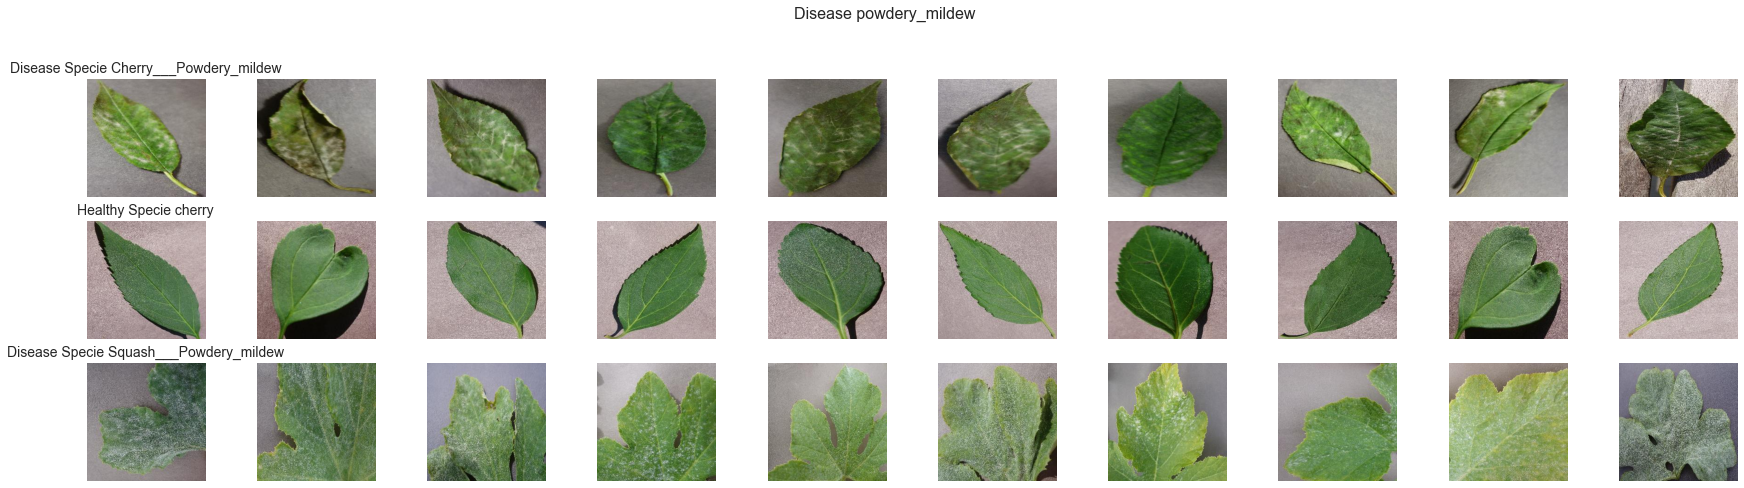

In [707]:
diseases = ['bacterial_spot', 'black_rot', 'early_blight', 'powdery_mildew']
base_path = '../resources/augmentation/'

for disease in diseases:
  dd = df_no_augmentation.loc[df_no_augmentation['disease'] == disease]
  row_len = len(dd)
  if row_len > 1:
    col_len = 10
    fig, axes = plt.subplots(row_len*2, col_len, figsize=(30, 10))
    fig.suptitle(f'Disease {disease}', fontsize=16)

    # get row odd and even to display simultanetly healthy + disease
    row_odd =  [num for num in list(range(row_len*2)) if num % 2 == 0]
    row_even =  [num for num in list(range(row_len*2)) if num % 2 != 0]

    indexes = dd.index
    for i in range(len(indexes)):
      disease_dir = indexes[i]
      specie = dd.iloc[i].specie 

      healthy = df_no_augmentation.loc[(df_no_augmentation['specie'] == specie) & (df_no_augmentation['healthy'])]
      if (len(healthy.index) >= 1):
        healthy_dir = healthy.index[0]
      else:
        healthy_dir = ''

      for j in range(col_len):
        specie_row_index = row_odd[i]
        healthy_row_index = row_even[i]

        # Disease
        curr_img = mpimg.imread(f"../resources/augmentation/{disease_dir}/image ({j + 1}).JPG")
        imgplot = axes[specie_row_index][j].imshow(curr_img)
        axes[specie_row_index][j].grid(None)
        axes[specie_row_index][j].axis('off')

        # Healthy
        if healthy_dir != '':
          curr_img = mpimg.imread(f"../resources/augmentation/{healthy_dir}/image ({j + 1}).JPG")
          imgplot = axes[healthy_row_index][j].imshow(curr_img)
          axes[healthy_row_index][j].grid(None)
          axes[healthy_row_index][j].axis('off')
        else:
          axes[healthy_row_index][j].set_visible(False)

        if (j == 0):
          axes[specie_row_index][0].set_title(f"Disease Specie {disease_dir}", fontsize=14)
          if healthy_dir != '':
            axes[healthy_row_index][0].set_title(f"Healthy Specie {specie}", fontsize=14)

# Disease family

Text(0.5, 1.0, 'with augmentation')

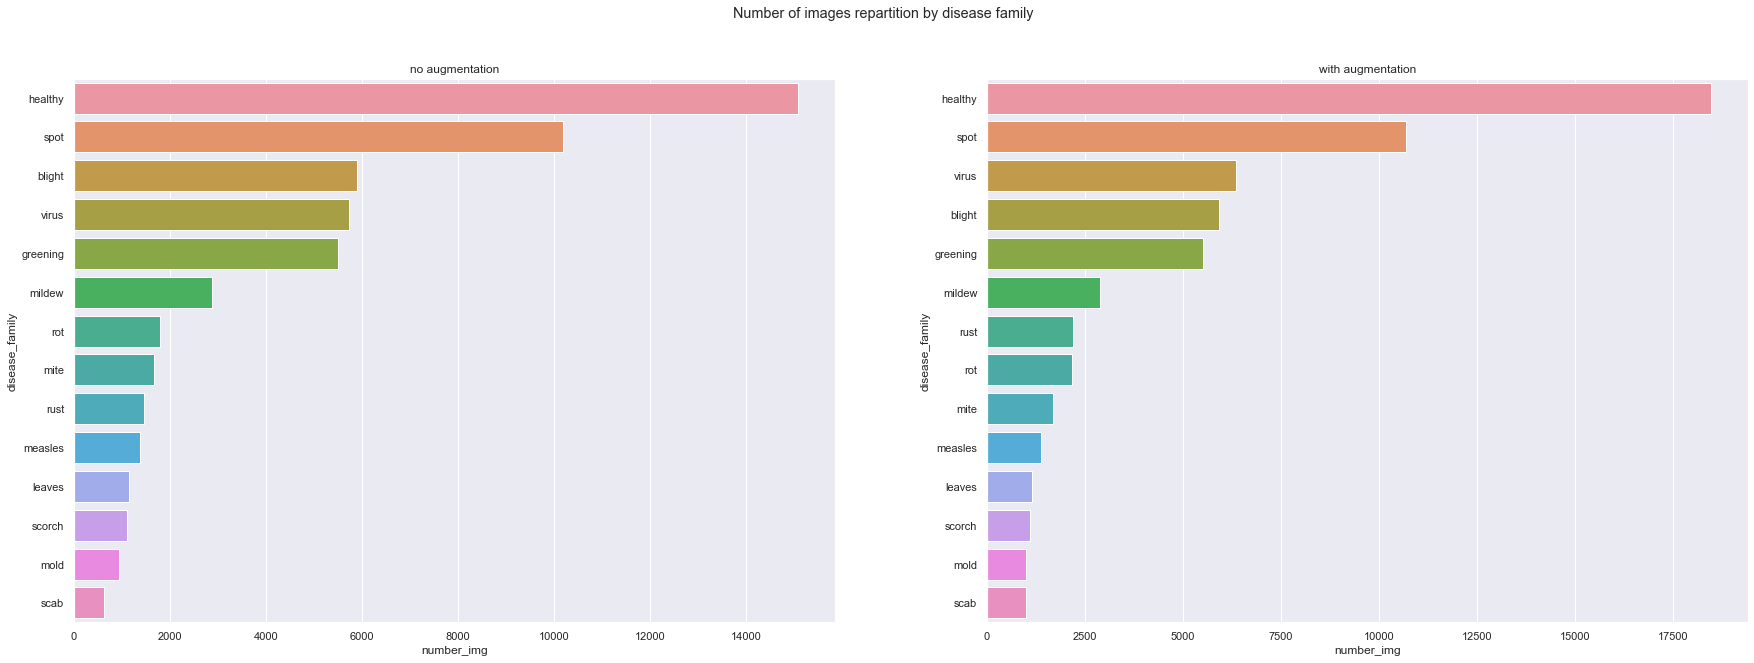

In [347]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number of images repartition by disease family')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease_family').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease_family').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease_family", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)
sns.barplot(ax=axes[1], x="number_img", y="disease_family", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

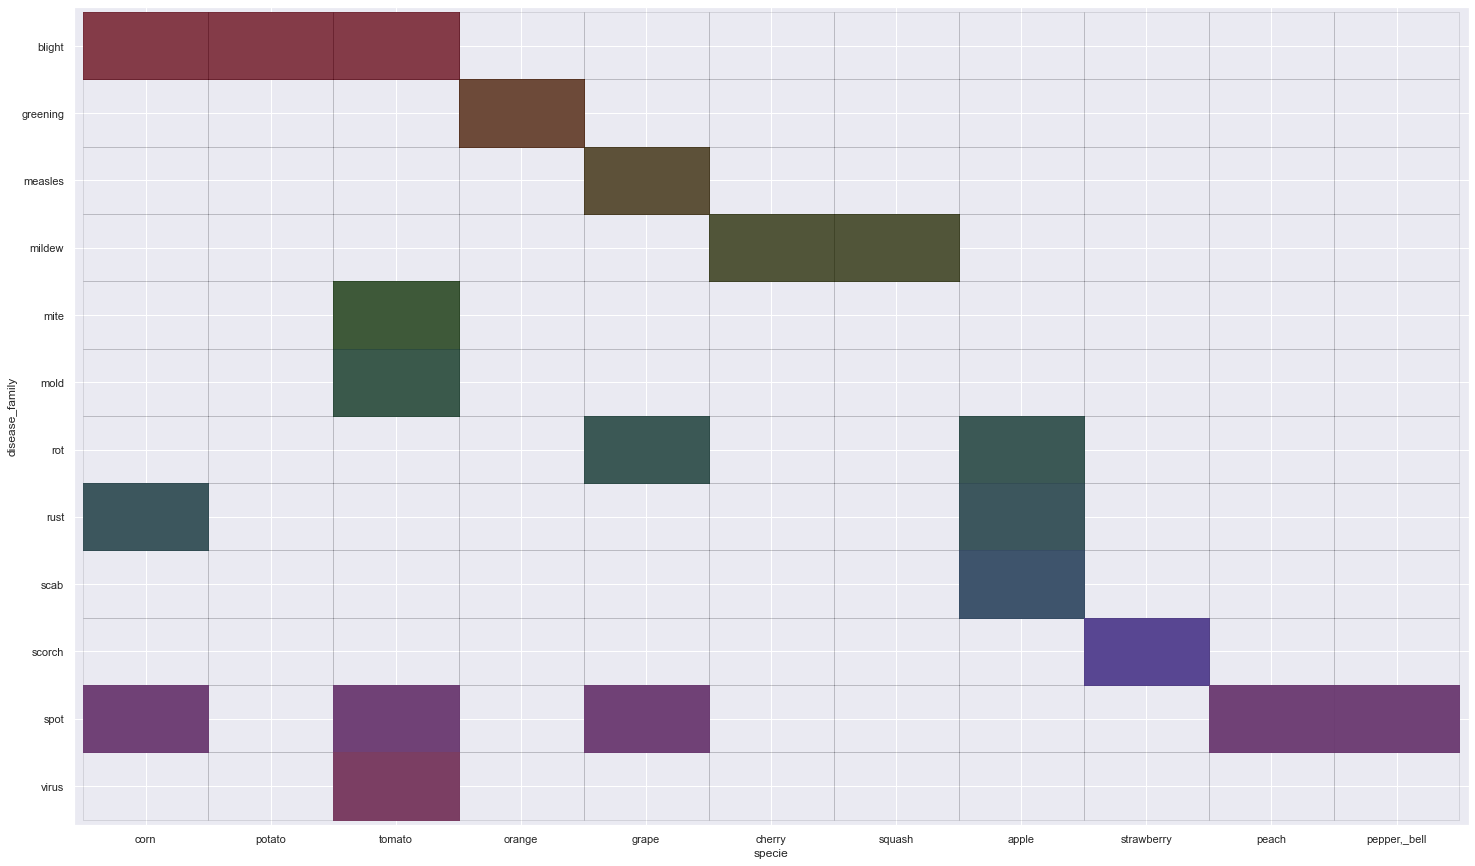

In [384]:
df_no_augmentation_groupby_disease_fam = df_no_augmentation.groupby(by=['disease_family', 'specie']).sum()
df_no_augmentation_groupby_disease_fam.reset_index(inplace=True)
df_no_augmentation_groupby_disease_fam.healthy = df_no_augmentation_groupby_disease_fam.healthy.astype(bool)
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[~df_no_augmentation_groupby_disease_fam['healthy']]
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[df_no_augmentation_groupby_disease_fam['disease'] != 'background_without_leaves']

plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease_family", x='specie', hue="disease_family", data=df_no_augmentation_groupby_disease_fam, legend=False, edgecolor="#02080602", linewidth=1)
ax.margins(x=0.007, y=0.007)